In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from __future__ import division, print_function, absolute_import, unicode_literals
from IPython.display import display
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import bokeh.io
import bokeh.mpl
import bokeh.plotting

%config InlineBackend.figure_formats = {'png', 'retina'}
bokeh.io.output_notebook()

rc = {'lines.linewidth': 1, 
      'axes.labelsize': 14, 
      'axes.titlesize': 14, 
      'axes.facecolor': 'FFFFFF',
       }

sns.set_context('notebook', rc=rc)
sns.set_style('white', rc=rc)
sns.set_palette("colorblind")

pd.set_option('precision', 4)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Loading BokehJS ...

In [2]:
def is_bad(x):
    if x in [-0.5, -1.0, 9.5]:
        return True
    else:
        return False

def load_transform(fp):
    df = pd.read_json(fp)
    df = df.sort_values(by=['trip', 't'])
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    df['trip_interval'] = pd.cut(df['trip'], 
                                    bins=bins,
                                    precision=3,
                                    labels = trips_intervals)
    df['success'] = df['success'].astype(int)
    df['reward'] = df['reward'].astype(int)
    df['bad_moves'] = df['reward'].apply(lambda x: int(is_bad(x)))
    return df


def plot_path(df, deadline=False):
    df = df.sort_values(by=['trip', 't'])
    grid = sns.FacetGrid(df, col="trip", 
                         hue="trip",
                         col_wrap=5,
                         size=2.0,
                         aspect=1.5)
    grid.map(plt.axhline, y=0, ls=":", c=".5", label='No move')
    grid.map(plt.plot, "t", "reward", marker="o", ms=5, lw=.8)

    if deadline:
        grid.set(xticks=np.linspace(0, 50, 6, endpoint=True), xlim=(-1, 50), ylim=(-3, 13))
    else:
        grid.set(xticks=np.linspace(0, 150, 6, endpoint=True), xlim=(-1, 150), ylim=(-3, 13))
    grid.fig.tight_layout(w_pad=1)
    plt.savefig("./figures/optmized_agent.png")
    plt.show()

def review_results(df):
    print('Successful trips:')
    display(pd.crosstab(df.trip_interval, df.success, margins=True).T)
    
    print("\nRewards:")
    display(pd.crosstab(df.trip_interval, df.reward, margins=True).T)

    print("\nBad moves:")
    display(pd.crosstab(df.trip_interval, df.bad_moves, margins=True).T)
    
def publish_results(df, n=1):
    print(tabulate(df.groupby(['trip_interval'])['success', 'bad_moves'].sum()/n,
         headers=['Trips', 'Success', 'Bad moves'],
         tablefmt='latex_booktabs'))
    
trips_intervals = ['01 - 10', '11 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60', '61 - 70', '71 - 80', '81 - 90', '91 - 100']

In [38]:
df = load_transform("./results/optimal_agent.json")

In [39]:
publish_results(df)

\begin{tabular}{lrr}
\toprule
 Trips    &   Success &   Bad moves \\
\midrule
 01 - 10  &         4 &           5 \\
 11 - 20  &         5 &           1 \\
 21 - 30  &         6 &           3 \\
 31 - 40  &         5 &           0 \\
 41 - 50  &         4 &           3 \\
 51 - 60  &         4 &           3 \\
 61 - 70  &         6 &           2 \\
 71 - 80  &         4 &           2 \\
 81 - 90  &         5 &           3 \\
 91 - 100 &         7 &           0 \\
\bottomrule
\end{tabular}


In [40]:
last_ten = df[df['trip_interval'] == '91 - 100']

In [41]:
last_ten['moves_left'] = last_ten['max_moves'] - last_ten['moves_taken']

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [45]:
cols = ['trip', 't', 'destination', 'location', 'light', 'way_point', 'oncoming', 'left', 'action', 'reward', 'moves_left']
check_df = last_ten[cols]
stagnent = check_df[check_df['reward'] < 2]
display(stagnent)
print(tabulate(stagnent, headers=(cols), tablefmt='latex_booktabs', missingval='None'), )

,trip,t,destination,location,light,way_point,oncoming,left,action,reward,moves_left
1828,91,19,"[1, 6]","[1, 2]",green,right,None,forward,None,0,1
1832,92,2,"[3, 2]","[4, 4]",red,forward,None,None,None,0,18
1835,92,5,"[3, 2]","[3, 3]",red,left,None,None,None,0,15
1836,92,6,"[3, 2]","[3, 3]",red,left,None,None,None,0,14
1837,92,7,"[3, 2]","[3, 3]",red,left,None,None,None,0,13
1838,92,8,"[3, 2]","[3, 3]",red,left,None,None,None,0,12
1839,92,9,"[3, 2]","[3, 3]",red,left,None,None,None,0,11
1842,93,1,"[7, 3]","[4, 5]",red,forward,None,None,None,0,34
1843,93,2,"[7, 3]","[4, 5]",red,forward,None,None,None,0,33
1845,93,4,"[7, 3]","[5, 5]",red,forward,None,None,None,0,31


\begin{tabular}{rrrllllrllrr}
\toprule
      &   trip &   t & destination   & location   & light   & way\_point   &   oncoming & left    & action   &   reward &   moves\_left \\
\midrule
 1828 &     91 &  19 & [1, 6]        & [1, 2]     & green   & right       &       None & forward & None     &        0 &            1 \\
 1832 &     92 &   2 & [3, 2]        & [4, 4]     & red     & forward     &       None & None    & None     &        0 &           18 \\
 1835 &     92 &   5 & [3, 2]        & [3, 3]     & red     & left        &       None & None    & None     &        0 &           15 \\
 1836 &     92 &   6 & [3, 2]        & [3, 3]     & red     & left        &       None & None    & None     &        0 &           14 \\
 1837 &     92 &   7 & [3, 2]        & [3, 3]     & red     & left        &       None & None    & None     &        0 &           13 \\
 1838 &     92 &   8 & [3, 2]        & [3, 3]     & red     & left        &       None & None    & None     &        0 &        

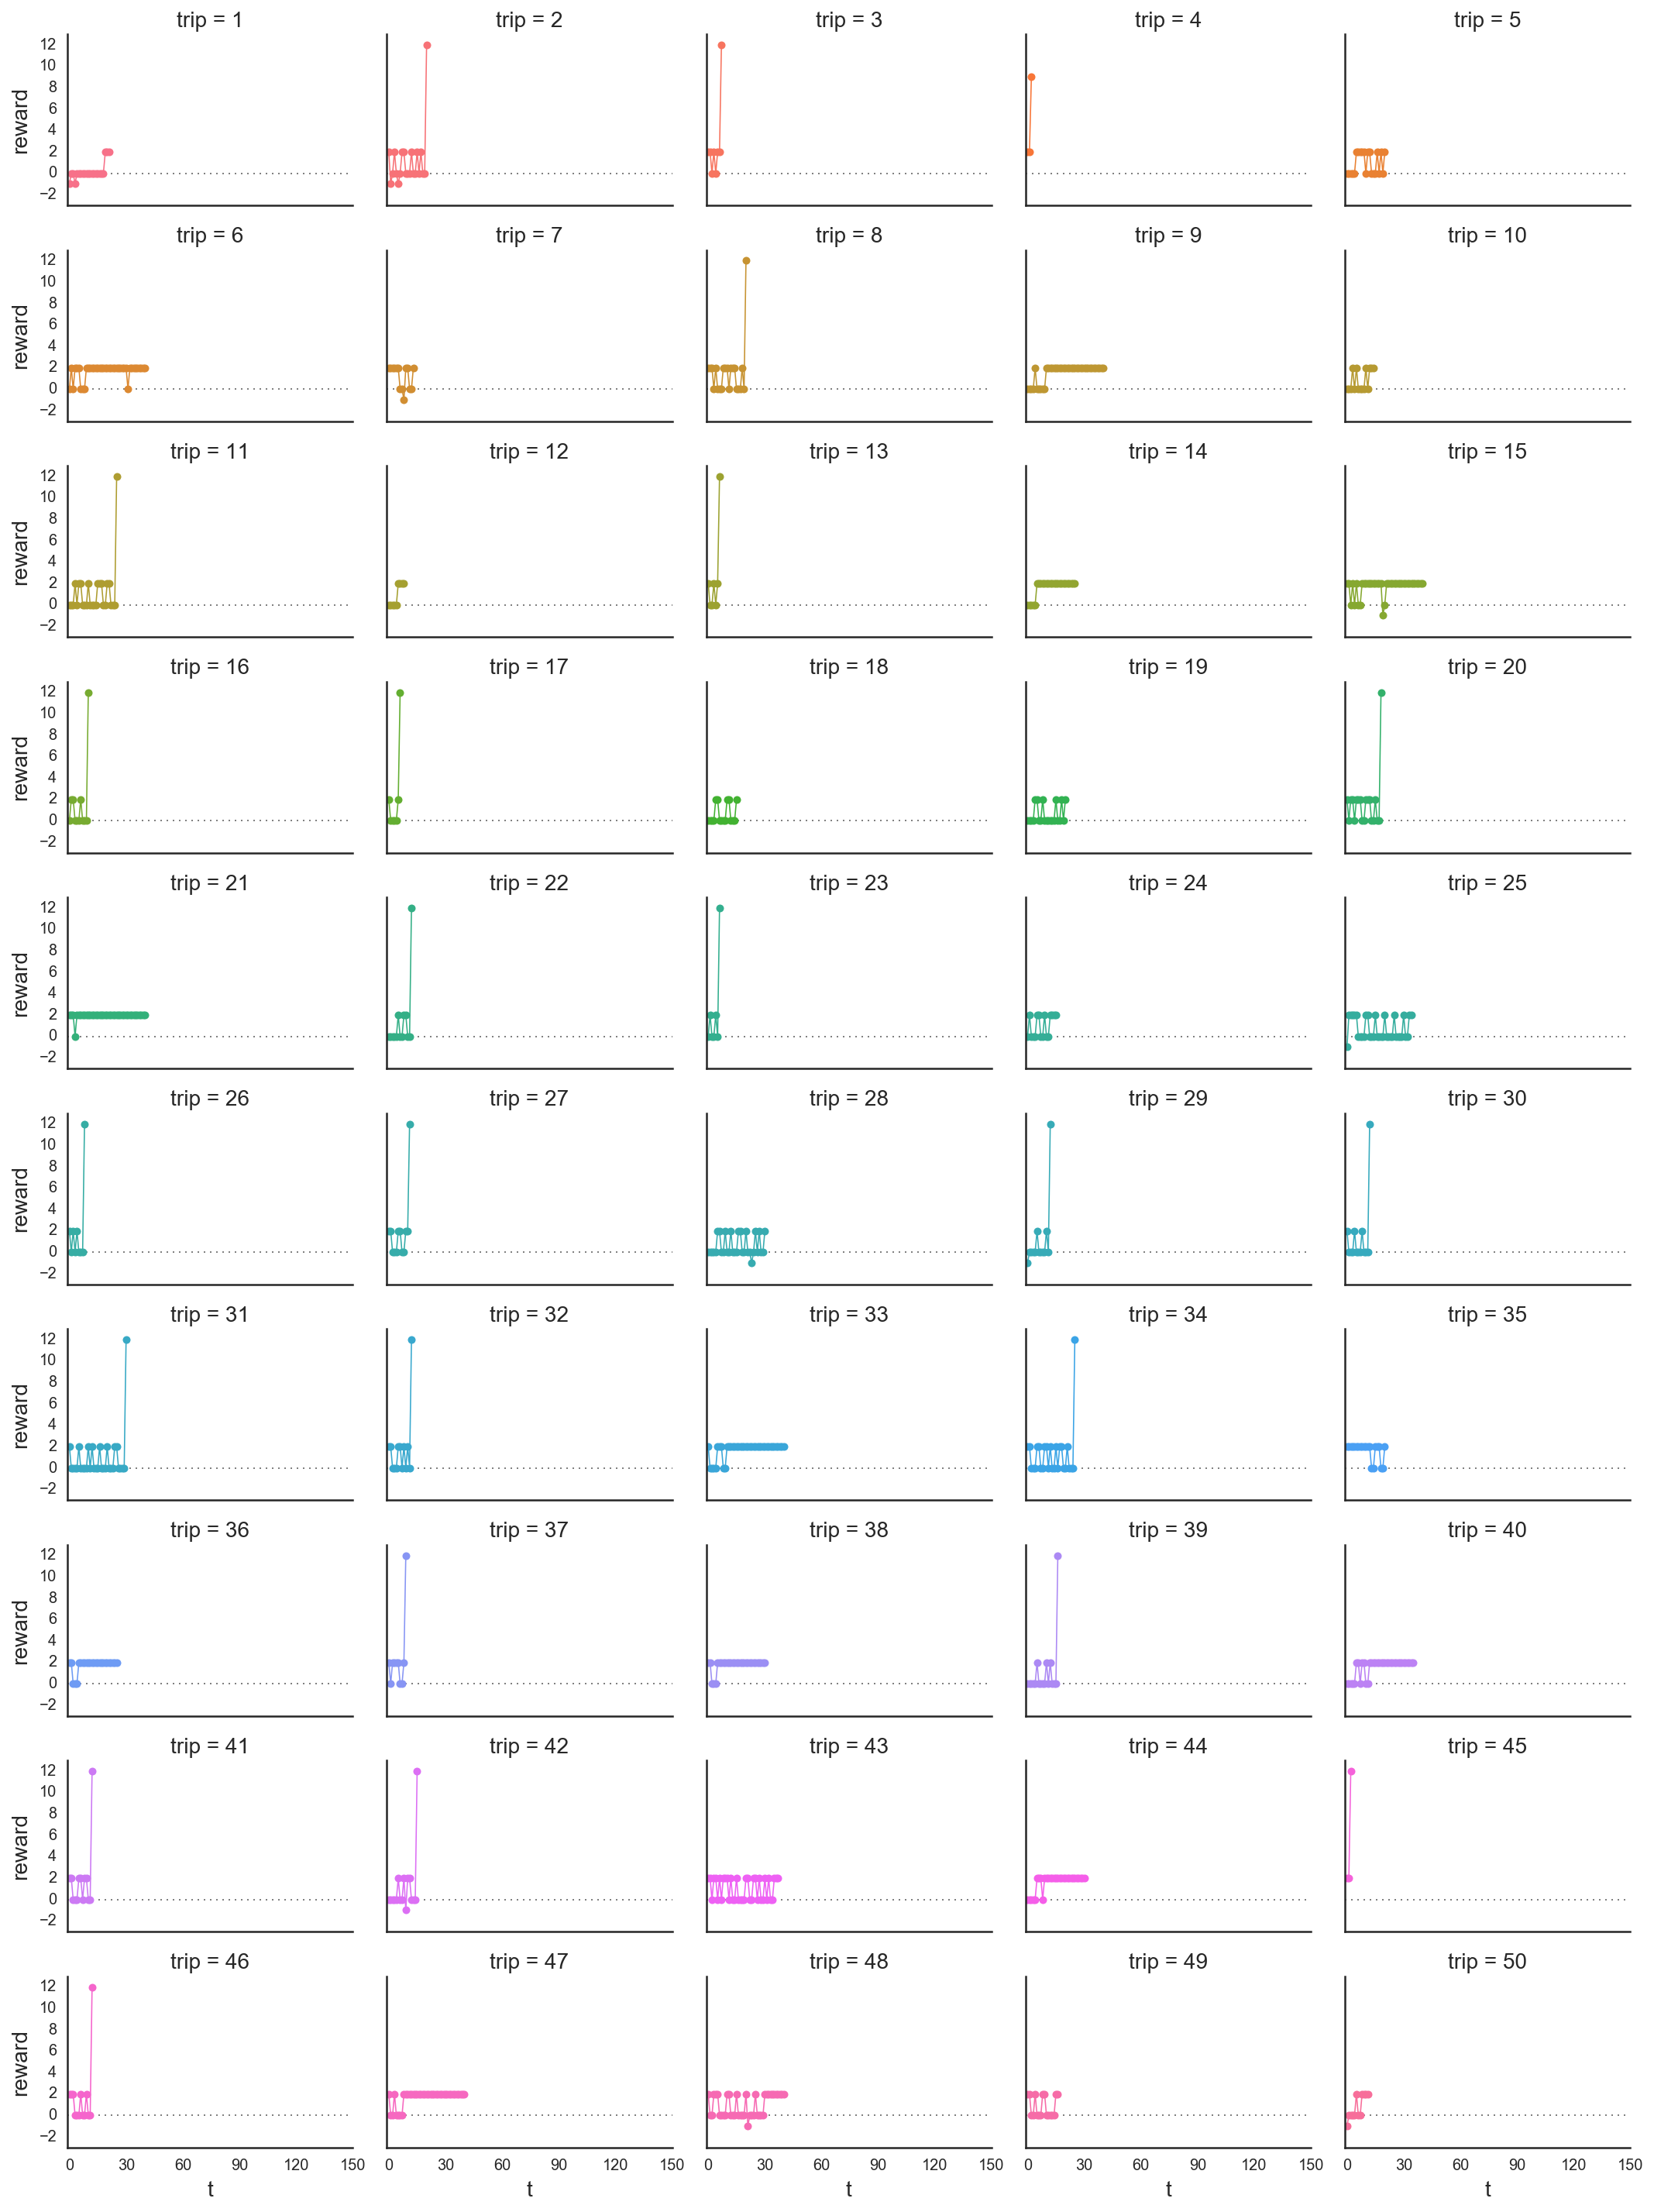

In [48]:
plot_path(df[df['trip'].apply(lambda x: x <= 50)])

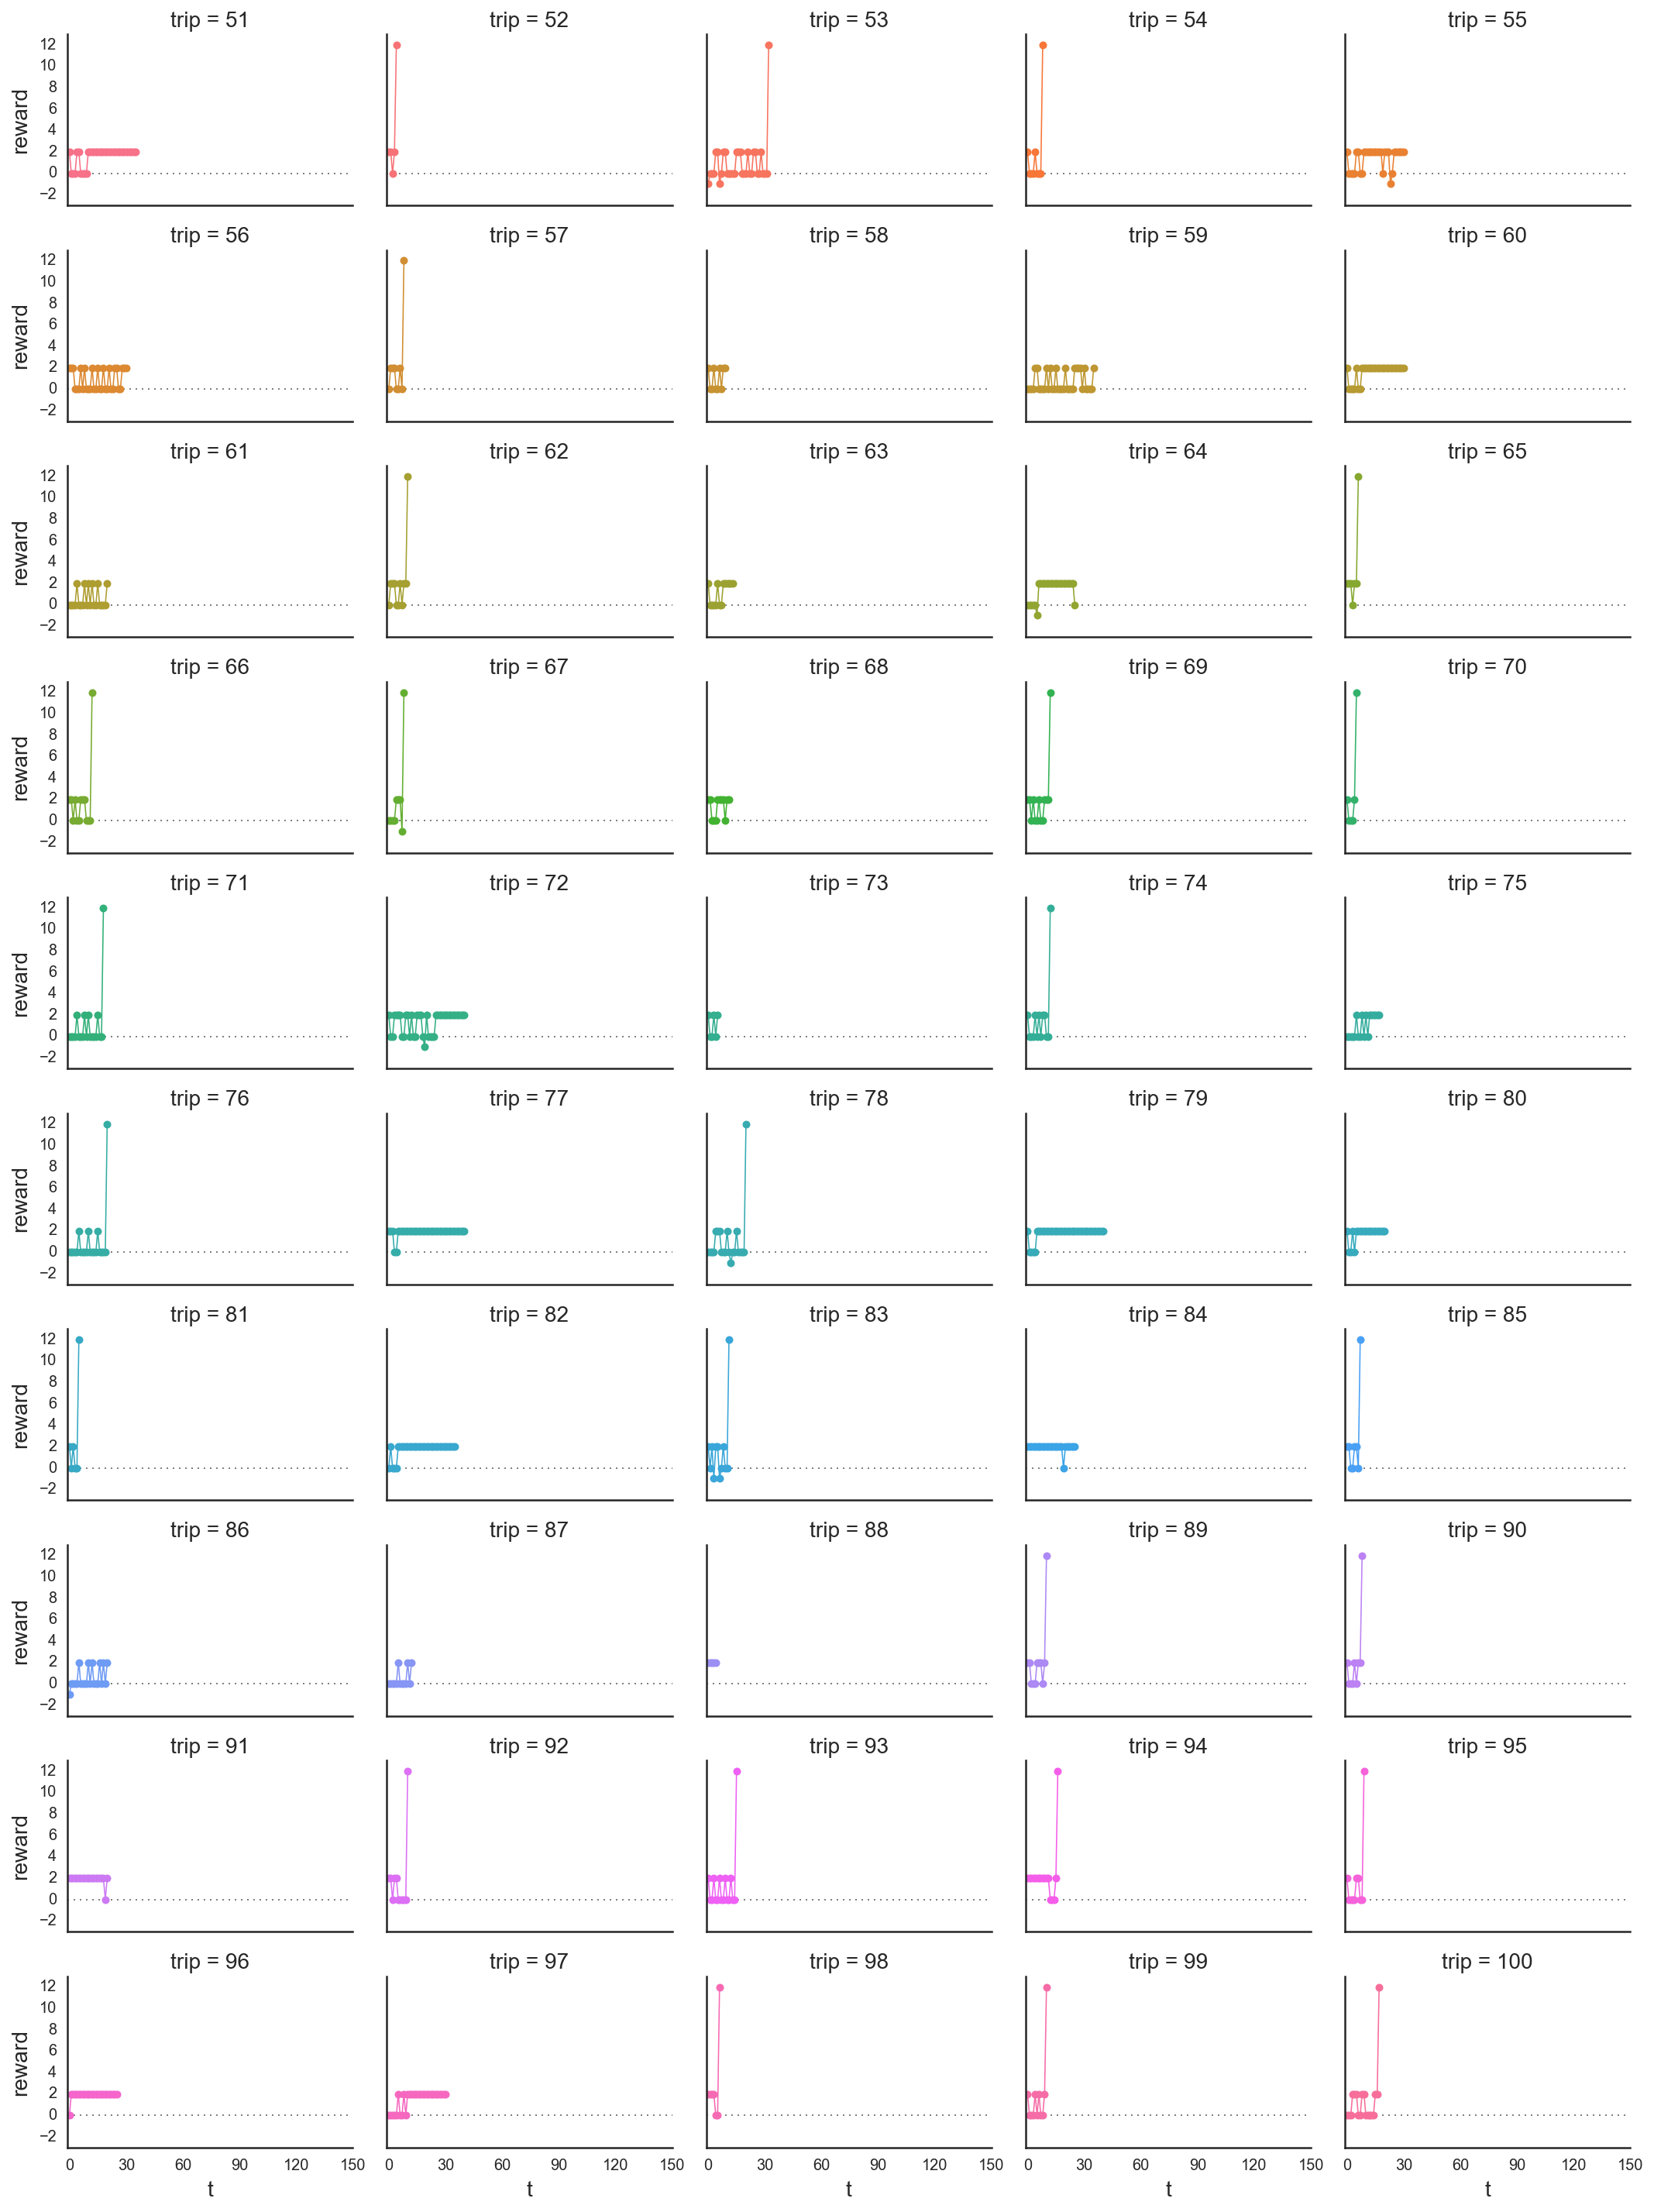

In [49]:
plot_path(df[df['trip'].apply(lambda x: x >= 51)])